In [1]:
using DataFrames
using DataStructures
using Plots
using Distributions
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [2]:
n=2
p=0.5
binom=Binomial(n, p)

Binomial{Float64}(n=2, p=0.5)

In [3]:
k_probs=[Distributions.pdf(binom, x) for x in 0:2]

3-element Vector{Float64}:
 0.24999999999999994
 0.49999999999999994
 0.24999999999999994

In [4]:
pmf_k=pmf_from_seq(0:2, k_probs)

3×2 DataFrame
 Row │ a      b       
     │ Int64  Float64 
─────┼────────────────
   1 │     0     0.25
   2 │     1     0.5
   3 │     2     0.25

In [5]:
function make_binomial(n, p)
    """Make a binomial Pmf."""
    binom=Binomial(n, p)
    ks=[pdf(binom, x) for x in 0:n]
    pmf_from_seq(0:n, ks)
end

make_binomial (generic function with 1 method)

In [6]:
pmf_k=make_binomial(250, 0.5);

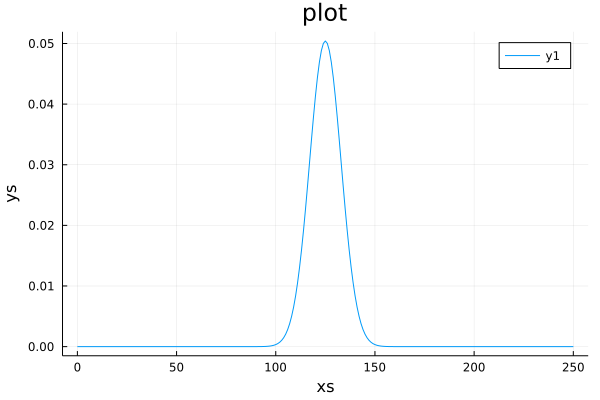

In [7]:
plot(pmf_k)

In [8]:
max_prob(pmf_k)

125

In [9]:
pmf_k[125]

0.05041221314731098

In [10]:
pmf_k[140]

0.00835718172491837

In [11]:
prob_ge(pmf_k, 140)

0.033210575620021734

In [12]:
prob_le(pmf_k, 110)

0.033210575620021734

In [28]:
hypos=range(0, 1, length=101)
prior=pmf_from_seq(hypos);

In [14]:
likelihood_heads=hypos
likelihood_tails=1 .-hypos
likelihood=Dict([('H', likelihood_heads), ('T', likelihood_tails)])

Dict{Char, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}} with 2 entries:
  'H' => 0.0:0.01:1.0
  'T' => 1.0:-0.01:0.0

In [15]:
dataset=vcat(fill('H', 140), fill('T', 110));

In [16]:
function update_euro(pmf, dataset)
    for d in dataset
        pmf *= likelihood[d]
    end
    pmf
end

update_euro (generic function with 1 method)

In [17]:
posterior=update_euro(prior, dataset);

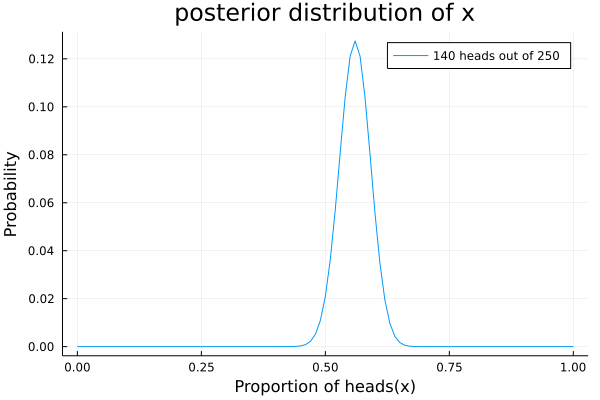

In [24]:
plot(posterior, 
    xaxis=("Proportion of heads(x)"), 
    yaxis=("Probability"), 
    label="140 heads out of 250", 
    plot_title="posterior distribution of x")

In [19]:
max_prob(posterior)

0.56

In [46]:
uniform=pmf_from_seq(hypos)
a=vcat(1:50, 51:-1:1)
triangle=pmf_from_seq(hypos, counts=a);

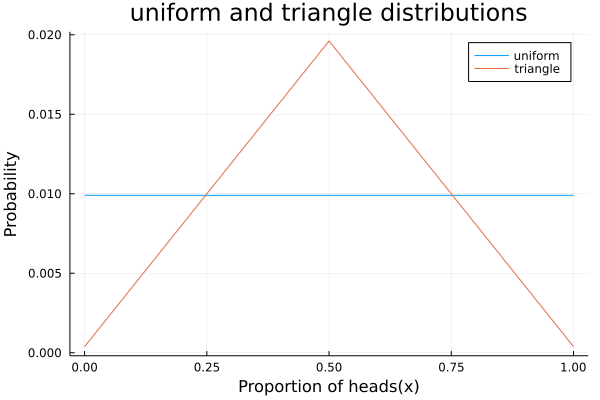

In [47]:
plot(uniform, xaxis=("Proportion of heads(x)"), yaxis=("Probability"), label="uniform", plot_title="uniform and triangle distributions")
plot!(triangle, label="triangle")

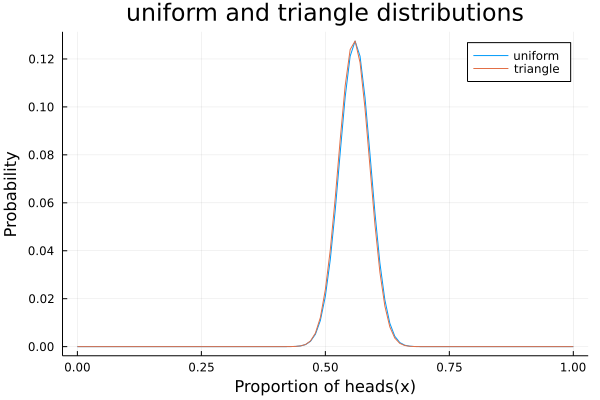

In [48]:
uniform_p=update_euro(uniform, dataset)
triangle_p=update_euro(triangle, dataset)
plot(uniform_p, xaxis=("Proportion of heads(x)"), yaxis=("Probability"), label="uniform", plot_title="uniform and triangle distributions")
plot!(triangle_p, label="triangle")